# Robot vision

In [137]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
from urllib import request

http://giusedroid.blogspot.com.br/2015/04/blog-post.html

http://petrkout.com/electronics/low-latency-0-4-s-video-streaming-from-raspberry-pi-mjpeg-streamer-opencv/

In [145]:
camera_addr = "http://192.168.0.18:8000/camera"
stream = request.urlopen(camera_addr)

def get_jpg():
    bytes = stream.read(50 * 1024)
    a, b = bytes.find(b'\xff\xd8'), bytes.find(b'\xff\xd9')
    if a != -1 and b != -1:
        return bytes[a:b+2]

In [139]:
def process_jpg(jpg):
    img = cv2.imdecode(np.fromstring(jpg, dtype=np.uint8), 3)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    
    ret, thresh1 = cv2.threshold(
        blur, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    im2, contours, hierarchy = cv2.findContours(
        thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    max_area = 0
    for i in range(len(contours)):
        cnt = contours[i]
        area = cv2.contourArea(cnt)
        if area > max_area:
            max_area = area
            ci = i

    cnt = contours[ci]
    hull = cv2.convexHull(cnt)
    drawing = np.zeros(img.shape, np.uint8)
    cv2.drawContours(drawing, [cnt], 0, (0,255,0), 2)
    cv2.drawContours(drawing, [hull], 0, (0,0,255), 2)
    
    return img, drawing

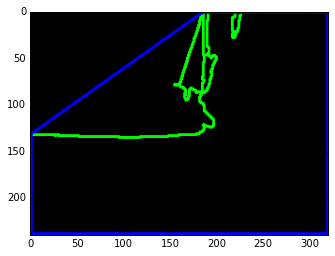

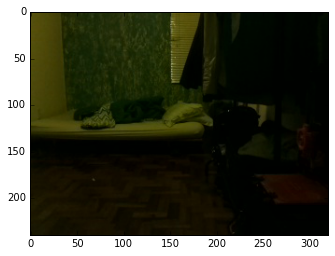

In [146]:
# while True:

jpg = get_jpg()
if jpg:
    img, drawing = process_jpg(jpg)
    
    plt.imshow(drawing)
    plt.show()
    
    plt.imshow(img)
    plt.show()
else:
    print("Image is empty")

In [143]:
stream.close()